# IITM - MLP - Week 7
#### Naive Bayes and KNN on housing data

## Imports

In [1]:
# ---------- Common ------------
import os
import time
import json
import random
import ast
from datetime import datetime
from collections import Counter
from pprint import pprint

# ---------- Data Manipulation ------------
import pandas as pd
import numpy as np

# ---------- Data Visualization ------------
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

# ---------- Sklearn ------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import permutation_test_score

from sklearn.preprocessing import add_dummy_feature
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import KBinsDiscretizer

# ---------- Sklearn ML Models ------------
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier

# ---------- Sklearn Metrics ------------
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import hinge_loss
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss

# ---------- Sklearn Abstract ------------
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

from sklearn.decomposition import PCA

from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import set_config

# ---------- Sklearn: Filter based ------------
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression

# ---------- Sklearn: Wrapper based ------------
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel

# ---------- Sklearn Datasets ------------
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets import make_blobs
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.datasets import make_multilabel_classification

# ---------- Sklearn External Datasets ------------
from sklearn.datasets import fetch_openml

# ---------- Imblearn ------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# ---------- Scipy ------------
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import loguniform
from scipy.stats import uniform

# ---------- Extras ------------
import pickle
# pickle.dump(model, open(filename, 'wb'))
# loaded_model = pickle.load(open(filename, 'rb'))

import tempfile

import warnings
warnings.filterwarnings("ignore")  # supress all warning (use with care)

## Presets

In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

plt.style.use('seaborn')
sns.set_theme(style="whitegrid")
# custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# sns.set_theme(style="ticks", rc=custom_params)

set_config(display='diagram')

np.random.seed(42)
# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)
mpl.rc("figure", figsize=(8,6))

## Common helper functions

In [3]:
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Std Dev: {scores.std()}')
    return

def multiple_scores(y_true, y_pred):
    Functions = [explained_variance_score, max_error, mean_absolute_error, mean_squared_error, r2_score]
    Names = ("Explained variance score : ", "Max Error : ", "Mean Absolute Error :", "Mean Squared Error: ", "R squared score: ")
    for func,name in zip(Functions, Names):
        print(name, func(y_true, y_pred))
        
        
class uniform_int:
    """ Integer output of uniform disribution """
    def __init__(self):
        self._distribution = uniform(a,b)
    
    def rvs(self, *args, **kwargs):
        return self._distribution.rvs(*args, **kwargs).astype(int)

# Text classification using Naive Bayes

## Load Data: 20 News groups

In [6]:
data = fetch_20newsgroups()

In [8]:
target_names = list(data.target_names)
print(target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [10]:
print(data.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [13]:
#  sample text 
print(data.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [14]:
# for simplicity take only 4 categories (there are total 20 categories)
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [15]:
# sample visualization
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



## Model building

In [23]:
# TfTfidfVectorizer: Convert a collection of raw documents to a matrix of TF-IDF features.

corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(X.shape)

(4, 9)


In [24]:
X.toarray()

array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524],
       [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
        0.        , 0.26710379, 0.51184851, 0.26710379],
       [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])

In [25]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [26]:
model = Pipeline(steps=[("tfidf", TfidfVectorizer()),("multiNB", MultinomialNB())])
model.fit(train.data, train.target)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('multiNB', MultinomialNB())])

## Model evaluation

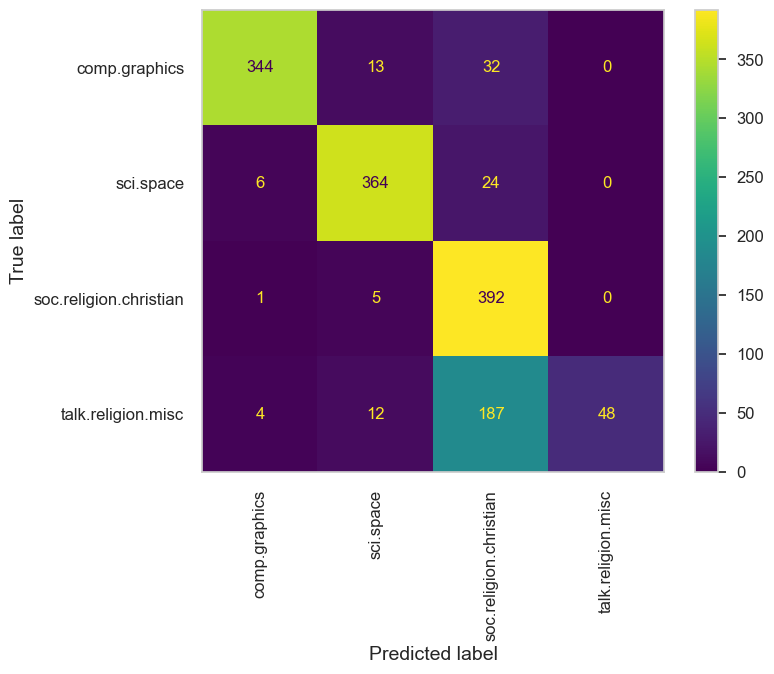

In [28]:
cm_disp = ConfusionMatrixDisplay.from_estimator(model, 
                                                test.data, 
                                                test.target, 
                                                display_labels=test.target_names, 
                                                xticks_rotation='vertical')
plt.grid(False)
plt.show()

In [29]:
# 'talk.religion.misc', 'soc.religion.christian' have confusion

In [34]:
#  predict category of text
s = 'sending a payload to ISS'
pred = model.predict([s])
print(f"Predicted category: {train.target_names[pred[0]]}")

Predicted category: sci.space


In [35]:
#  predict category of text
s = 'screen resolution'
pred = model.predict([s])
print(f"Predicted category: {train.target_names[pred[0]]}")

Predicted category: comp.graphics


# KNN on California housing Dataset

## Load Data

In [4]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True) # returns tuple of data dataframe and label dataframe
print(f"Shape of X: {X.shape}") 
print(f"Shape of y: {y.shape}")

Shape of X: (20640, 8)
Shape of y: (20640,)


## Preprocessing

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.3, random_state=8)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (14448, 8)
X_test shape: (6192, 8)
y_train shape: (14448,)
y_test shape: (6192,)


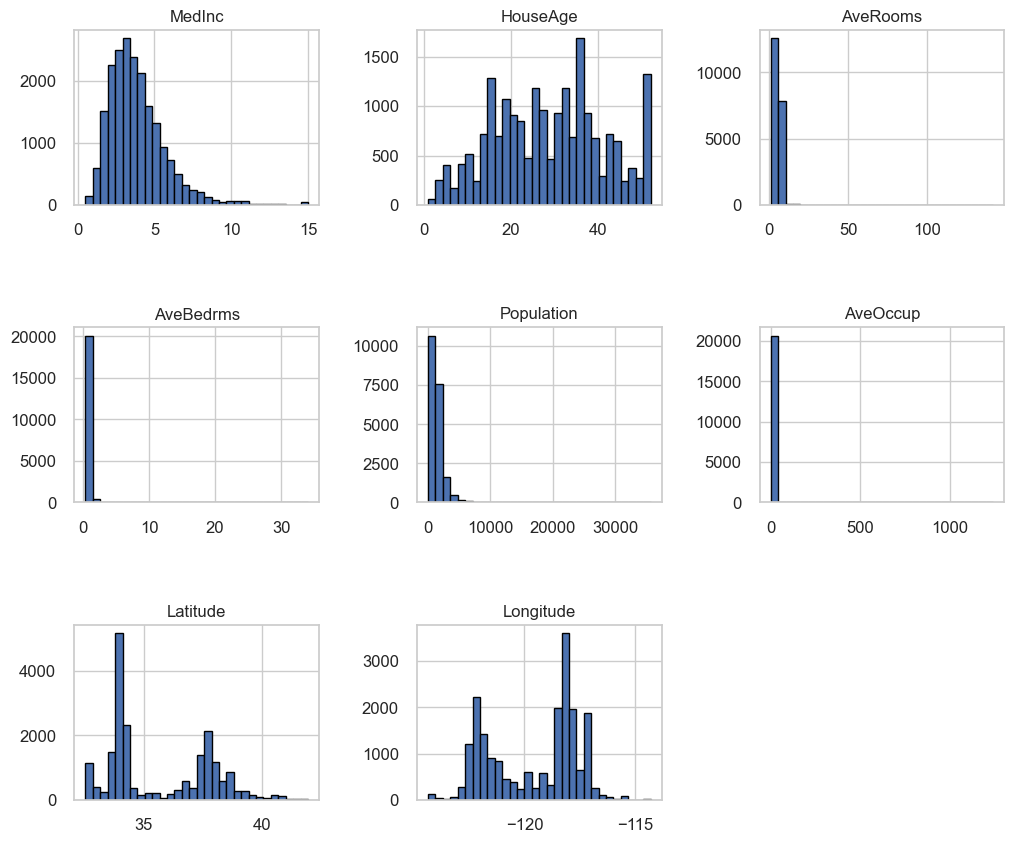

In [6]:
X.hist(bins=30, edgecolor="black", figsize=(12,10))
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

## Model Building

In [7]:
# Features are on different scale
# For KNN features MUST be on same scale because it uses eucledien distance 

pipe = Pipeline(steps=[('scaler', MinMaxScaler()),
                       ('knn', KNeighborsRegressor(n_neighbors=2))])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

error = mean_squared_error(y_test, y_pred, squared=False)
print(error)

0.6767822465759739


## Model selection and evaluation

### Manual Hyperparam tuning

In [8]:
rmse_val = []

for k in range(1, 31):
    pipe = Pipeline(steps=[('scaler', MinMaxScaler()),
                       ('knn', KNeighborsRegressor(n_neighbors=k))])

    pipe.fit(X_train, y_train)
    error = mean_squared_error(y_test, pipe.predict(X_test), squared=False)
    rmse_val.append(error)
    
print(rmse_val)

[0.7640415519491153, 0.6767822465759739, 0.6528807794310142, 0.6405363672504784, 0.6313551708664618, 0.6255268557053962, 0.6229026195917569, 0.6204175761575943, 0.6195418732794183, 0.6195473252868735, 0.620788287261366, 0.6215524920183454, 0.6217404460866567, 0.6228424176831246, 0.6236817674800399, 0.6242792209861466, 0.624958144833677, 0.6249803499406179, 0.6264648358188858, 0.6273601485215329, 0.628068717178754, 0.6293871685396182, 0.6293142438161707, 0.6311630619534178, 0.6321290284206745, 0.6328294296899961, 0.6339636367026366, 0.6349935294705674, 0.6356220667430714, 0.6365126933355182]


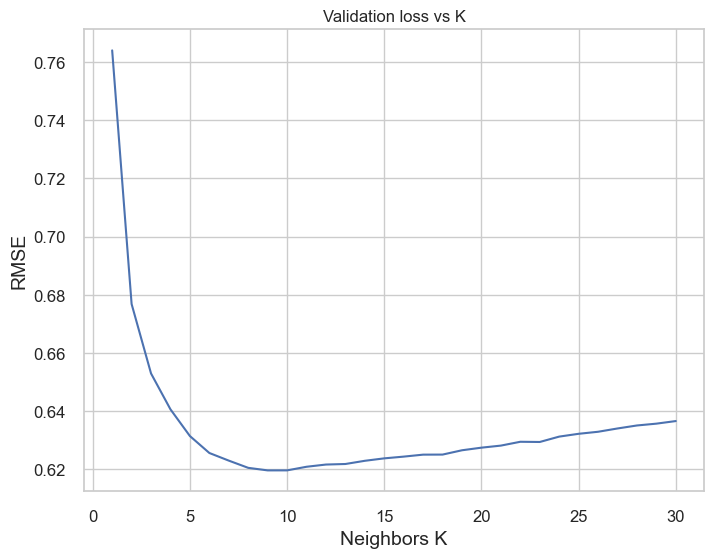

In [9]:
plt.figure(figsize=(8,6))

plt.plot(range(1, len(rmse_val)+1), rmse_val, "b-")
plt.ylabel("RMSE")
plt.xlabel("Neighbors K")
plt.title("Validation loss vs K")
plt.grid(True)
plt.show()

In [10]:
best_k = list(range(1, 31))[np.argmin(rmse_val)]
best_k

9

### GridSearchCV Hyperparam tuning

In [11]:
param_grid = {'knn__n_neighbors': list(range(1,20))}

pipe = Pipeline(steps=[('scaler', MinMaxScaler()),
                       ('knn', KNeighborsRegressor())])

gs_knn = GridSearchCV(estimator=pipe,
                     param_grid=param_grid,
                     cv=10,
                     n_jobs=-1,
                     return_train_score=True)

gs_knn.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             return_train_score=True)

In [12]:
gs_knn.best_estimator_[1].n_neighbors

6

In [13]:
pred = gs_knn.best_estimator_.predict(X_test)
error = mean_squared_error(y_test, pred, squared=False)
print(error)

0.6255268557053962


In [14]:
#  manually we got k=9 and error 0.62
#  with grid search we got k=6 and error=0.62

## Using polynomial transformation

In [16]:
param_grid = {'knn__n_neighbors': list(range(1,10)),
             'poly__degree': list(range(1,3))}

pipe = Pipeline(steps=[('poly', PolynomialFeatures()),
                        ('scaler', MinMaxScaler()),
                       ('knn', KNeighborsRegressor())])

gs_knn = GridSearchCV(estimator=pipe,
                     param_grid=param_grid,
                     cv=5,
                     return_train_score=True)

gs_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'poly__degree': [1, 2]},
             return_train_score=True)

In [17]:
gs_knn.best_params_

{'knn__n_neighbors': 8, 'poly__degree': 1}

In [18]:
pred = gs_knn.best_estimator_.predict(X_test)
error = mean_squared_error(y_test, pred, squared=False)
print(error)

0.6204175761575943


# END